In [36]:
import numpy as np
import matplotlib.pyplot as plt

In [99]:
n = 30
start = -2
stop = 2

x = np.linspace(start,stop,n)

eps = 1
np.random.seed(1)
r = np.random.rand(1,n) * eps

y1 = x*(np.cos(r + 0.5*x**3) + np.sin(0.5*x**3))
y2 = y = 4*x**5 - 5*x**4 - 20*x**3 + 10*x**2 + 40*x + 10 + r

y1 = np.ravel(y1) # flattens the array to 1D
y2 = np.ravel(y2)

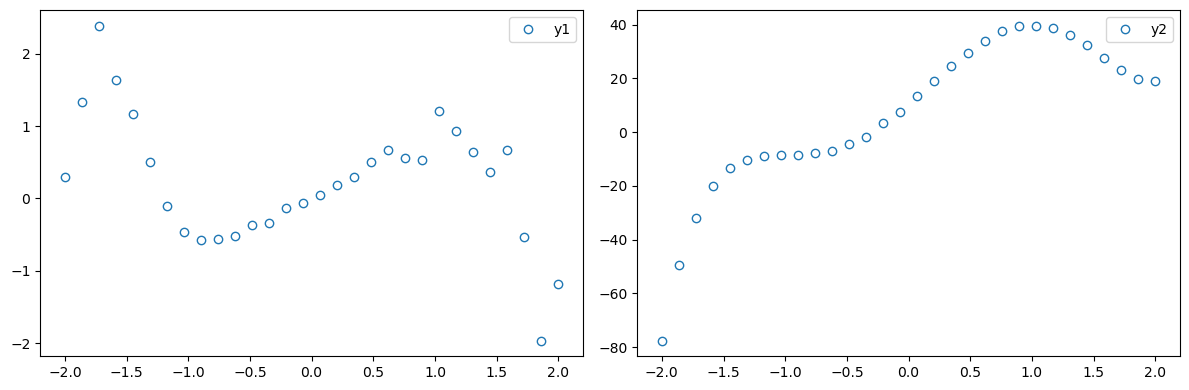

In [100]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

ax1.plot(x, y1, "o", label="y1", markerfacecolor='none')
ax1.legend()

ax2.plot(x, y2, "o", label="y2", markerfacecolor='none')
ax2.legend()

plt.tight_layout()
plt.show()
plt.close()

The idea of QR factorisation is that from $\boldsymbol{Ax} = \boldsymbol{b}$ we factorize $\boldsymbol{A}$ into the the orthogonal matrix $\boldsymbol{Q}$ and the upper triangular matrix $\boldsymbol{R}$, so that $\boldsymbol{A} = \boldsymbol{QR}$, and $\boldsymbol{Ax} = \boldsymbol{QRx} = \boldsymbol{b}$.

Since $\boldsymbol{Q}$ i orthogonal it will be invertible and also have the helpful property of $\boldsymbol{Q}^{-1} = \boldsymbol{Q}^{T}$. First we write:
$$
\boldsymbol{QRx} = \boldsymbol{b}
$$

$$
\boldsymbol{Qy} = \boldsymbol{b}
$$

Where $\boldsymbol{y} = \boldsymbol{Rx}$. Then we solve:

$$
\boldsymbol{Q}^T \boldsymbol{Qy} = \boldsymbol{Q}^T \boldsymbol{b}
$$

And because of the properties of orthogonal matrices, we have:

$$
\boldsymbol{Q}^{-1} \boldsymbol{Qy} = \boldsymbol{Q}^T \boldsymbol{b}
$$

$$
\boldsymbol{y} = \boldsymbol{Q}^T \boldsymbol{b}
$$

Now, $\boldsymbol{Q}^T \boldsymbol{b}$ is solvable by elementary operations, so can find $\boldsymbol{y}$.

From this we can solve $\boldsymbol{Rx} = \boldsymbol{y}$ by back substitution.

In [ ]:
# 1. Find QR factorization of matrix A

def back_substitution(A, b):
    """
    Calculate x in Ax = b by back substitution.
    """
    Q, R = np.linalg.qr(A)

    y = Q.T @ b

    # Prepare R and y for back substitution, to solve: Rx = y.
    n = np.shape(R)[0]  # number of rows in R
    m = np.shape(R)[1]  # number of columns in R
    # Create augmented matrix Ry, shape (n, m+1)
    Ry = np.zeros((n, m+1))
    Ry[:,:m] = R
    Ry[:,-1] = y

    # The back substitution
    # Solving the system Rx = y for x by back substitution, here by using row operations, Gauss elimination, on the augmented matrix [R y], 
    # which we turn into [I ~y], having the weight/parameters x = ~y
    for i in range(n):
        # Staring from the bottom row
        # First, find the the diagonal element of R in this row, use it to divide it self and the corresponding row element in y   
        pivot = np.copy(Ry[-1-i,-2-i])  # pivot element of row this row
                
        Ry[-1-i,-2-i] /= pivot          # the pivot element equals it self divided by the pivot element
        Ry[-1-i,-1] /= pivot            # the corresponding y value equals it self divided by the pivot element

        # Second, make all column elements above the pivot element zero by row operations, also updating y accordingly
        p_col = np.copy(Ry[:-1-i,-2-i]) # array of all column elements in column -2-i above row -1-i, -1-i is excluded
        y_pivot = np.copy(Ry[-1-i,-1])  # y value corresponding to pivot element

        Ry[:-1-i,-2-i] = Ry[:-1-i,-2-i] + (-1.0*p_col)      # add the negative value of it self for all elements above pivot
        Ry[:-1-i,-1] = Ry[:-1-i,-1] + (-1.0*p_col*y_pivot)  # add the value of y_pivot times the product of corresponding to row operation on that row         

    x = Ry[:,-1]
    return x

[18.23216626 23.01160621 -8.27883947 -1.16341095]


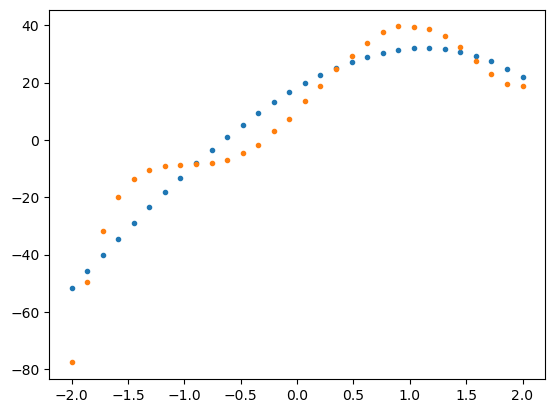

In [132]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(3)
A = poly.fit_transform(x.reshape(-1,1))
#print(A)
xA = back_substitution(A, y2)
print(xA)
pred = A @ xA

plt.plot(A[:,1], pred, ".")
plt.plot(x, y2, ".")